<a href="https://colab.research.google.com/github/wvirany/mini_projects/blob/main/overparameterized_methods/RF_interpolating_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import interpolate

from sklearn.datasets import make_circles, make_classification, make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import log_loss, mean_squared_error as mse

In [296]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(["tomato", "#0000FF"])

## Pure Noise Example

In [297]:
num_samples = 2500
p = .8

In [298]:
X1 = np.random.random_sample(size=num_samples)
X2 = np.random.random_sample(size=num_samples)

X = np.stack((X1, X2), axis=1)
y = np.random.binomial(n=1, p=p, size=num_samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

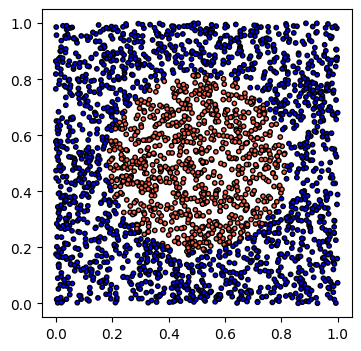

In [333]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', s=10);

This is a pure noise dataset with $P(y=1 \lvert x) = .75$

### 5 different RFs:

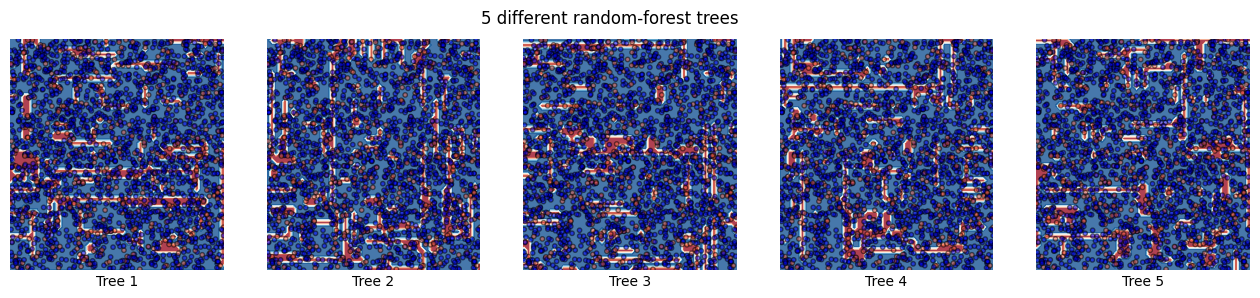

In [300]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 3))
fig.suptitle('5 different random-forest trees')

for i in range(5):

  rf = RandomForestClassifier(n_estimators=1,
                              max_leaf_nodes=num_samples,
                              max_features=1)

  rf.fit(X, y)

  DecisionBoundaryDisplay.from_estimator(rf, X, cmap=cm, alpha=.8, ax=axes[i], eps=.5)

  axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', alpha=.5, s=10)

  axes[i].set_title('Tree ' + str(i+1), y=-.1, fontsize=10)
  axes[i].axis('off')
  axes[i].set_xlim(0, 1)
  axes[i].set_ylim(0, 1)

In [301]:
rf = RandomForestClassifier(n_estimators=5,
                            max_leaf_nodes=num_samples,
                            max_features=1,
                            bootstrap=True)

rf.fit(X, y);

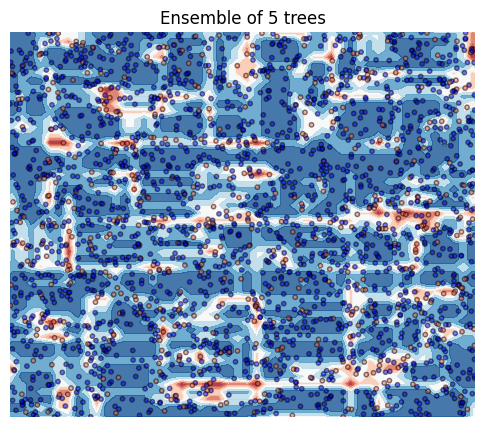

In [302]:
fig, ax = plt.subplots(figsize=(6,5))

DecisionBoundaryDisplay.from_estimator(rf, X, cmap=cm, alpha=.8, ax=ax, eps=.5)

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', alpha=.5, s=10)

ax.set_title('Ensemble of 5 trees')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off');

In [303]:
rf = RandomForestClassifier(n_estimators=100,
                            max_leaf_nodes=num_samples,
                            max_features=1,
                            bootstrap=True)

rf.fit(X, y);

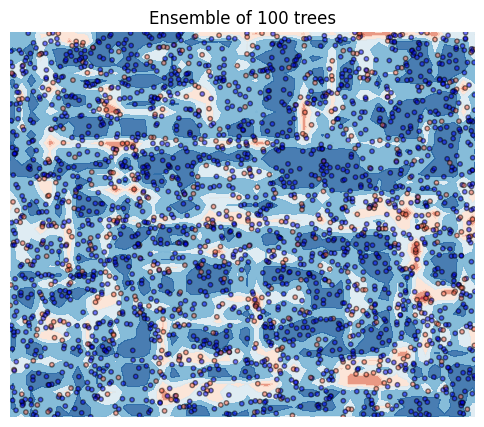

In [304]:
fig, ax = plt.subplots(figsize=(6,5))

DecisionBoundaryDisplay.from_estimator(rf, X, cmap=cm, alpha=.8, ax=ax, eps=.5)

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', alpha=.5, s=10)

ax.set_title('Ensemble of 100 trees')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off');

In [305]:
train_loss = []
test_loss = []

for i in range(1, 100):

  rf = RandomForestClassifier(n_estimators=i,
                              max_leaf_nodes=num_samples,
                              max_features=1,
                              bootstrap=True)

  rf.fit(X_train, y_train)

  train_pred = rf.predict(X_train)
  test_pred = rf.predict(X_test)

  train_loss.append(log_loss(y_train, train_pred))
  test_loss.append(log_loss(y_test, test_pred))

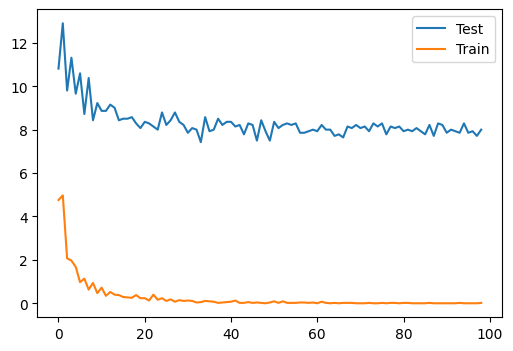

In [306]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(test_loss, label='Test')
ax.plot(train_loss, label='Train')

ax.legend();

## An Example with Signal

Drawing random samples within a circle centered at $(.5, .5)$ with radius $\approx .31$:

In [307]:
num_samples = 2500
p = .9

In [308]:
X1 = np.random.random_sample(size=num_samples)
X2 = np.random.random_sample(size=num_samples)
X = np.stack((X1, X2), axis=1)

y = np.zeros(num_samples)

for i, sample in enumerate(X):

  if (sample[0] - .5)**2 + (sample[1] - .5)**2 < .1:
    y[i] = np.random.binomial(n=1, p=1-p)

  else:
    y[i] = np.random.binomial(n=1, p=p)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

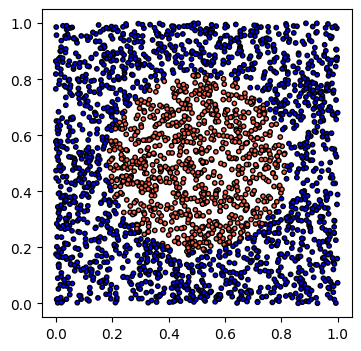

In [332]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', s=10);

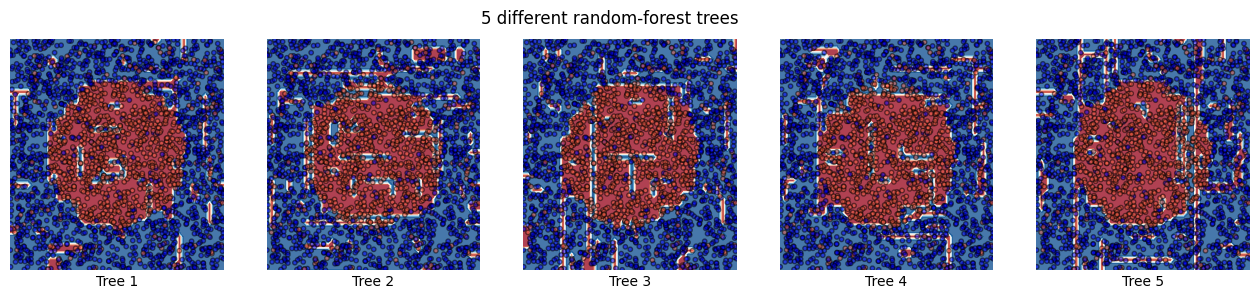

In [310]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 3))
fig.suptitle('5 different random-forest trees')

for i in range(5):

  rf = RandomForestClassifier(n_estimators=1,
                              max_leaf_nodes=num_samples,
                              max_features=1)

  rf.fit(X, y)

  DecisionBoundaryDisplay.from_estimator(rf, X, cmap=cm, alpha=.8, ax=axes[i], eps=.5)

  axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', alpha=.5, s=10)

  axes[i].set_title('Tree ' + str(i+1), y=-.1, fontsize=10)
  axes[i].axis('off')
  axes[i].set_xlim(0, 1)
  axes[i].set_ylim(0, 1)

In [311]:
rf = RandomForestClassifier(n_estimators=5,
                            max_leaf_nodes=num_samples,
                            max_features=1,
                            bootstrap=True)

rf.fit(X, y);

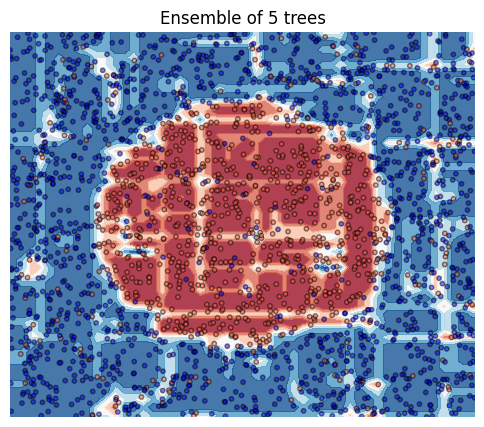

In [312]:
fig, ax = plt.subplots(figsize=(6,5))

DecisionBoundaryDisplay.from_estimator(rf, X, cmap=cm, alpha=.8, ax=ax, eps=.5)

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', alpha=.5, s=10)

ax.set_title('Ensemble of 5 trees')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off');

In [313]:
rf = RandomForestClassifier(n_estimators=100,
                            max_leaf_nodes=num_samples,
                            max_features=1,
                            bootstrap=True)

rf.fit(X, y);

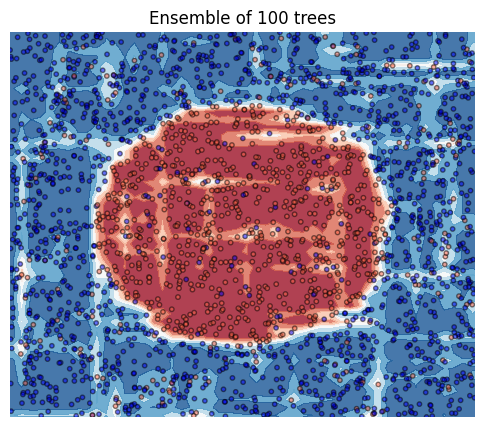

In [314]:
fig, ax = plt.subplots(figsize=(6,5))

DecisionBoundaryDisplay.from_estimator(rf, X, cmap=cm, alpha=.8, ax=ax, eps=.5)

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', alpha=.5, s=10)

ax.set_title('Ensemble of 100 trees')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off');

In [315]:
train_loss = []
test_loss = []

for i in range(1, 100):

  rf = RandomForestClassifier(n_estimators=i,
                              max_leaf_nodes=num_samples,
                              max_features=1,
                              bootstrap=True)

  rf.fit(X_train, y_train)

  train_pred = rf.predict(X_train)
  test_pred = rf.predict(X_test)

  train_loss.append(log_loss(y_train, train_pred))
  test_loss.append(log_loss(y_test, test_pred))

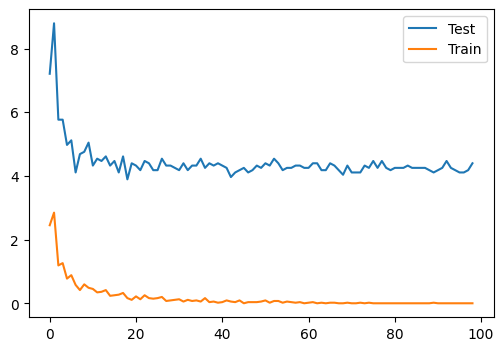

In [316]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(test_loss, label='Test')
ax.plot(train_loss, label='Train')

ax.legend();

## Zero Noise Example

In [317]:
num_samples = 2500
p = .9

In [318]:
X1 = np.random.random_sample(size=num_samples)
X2 = np.random.random_sample(size=num_samples)
X = np.stack((X1, X2), axis=1)

y = np.zeros(num_samples)

for i, sample in enumerate(X):

  if (sample[0] - .5)**2 + (sample[1] - .5)**2 < .1:
    y[i] = 0

  else:
    y[i] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

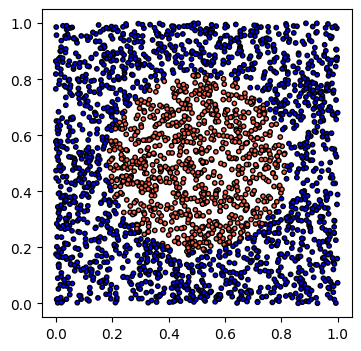

In [331]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', s=10);

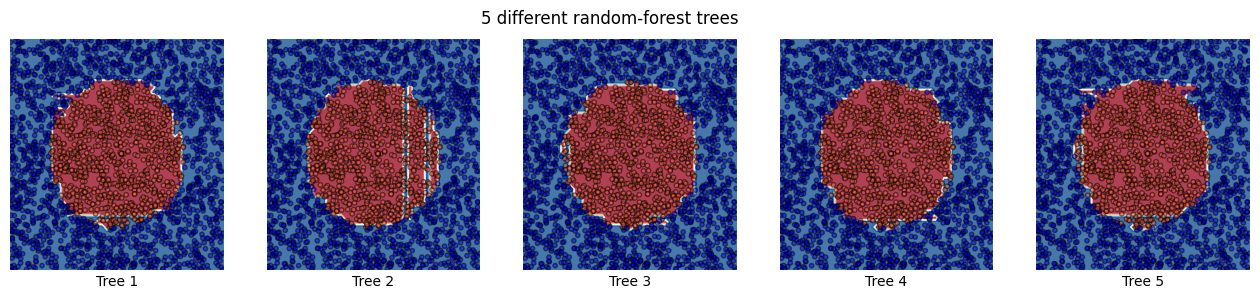

In [320]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 3))
fig.suptitle('5 different random-forest trees')

for i in range(5):

  rf = RandomForestClassifier(n_estimators=1,
                              max_leaf_nodes=num_samples,
                              max_features=1)

  rf.fit(X, y)

  DecisionBoundaryDisplay.from_estimator(rf, X, cmap=cm, alpha=.8, ax=axes[i], eps=.5)

  axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', alpha=.5, s=10)

  axes[i].set_title('Tree ' + str(i+1), y=-.1, fontsize=10)
  axes[i].axis('off')
  axes[i].set_xlim(0, 1)
  axes[i].set_ylim(0, 1)

In [321]:
rf = RandomForestClassifier(n_estimators=5,
                            max_leaf_nodes=num_samples,
                            max_features=1,
                            bootstrap=True)

rf.fit(X, y);

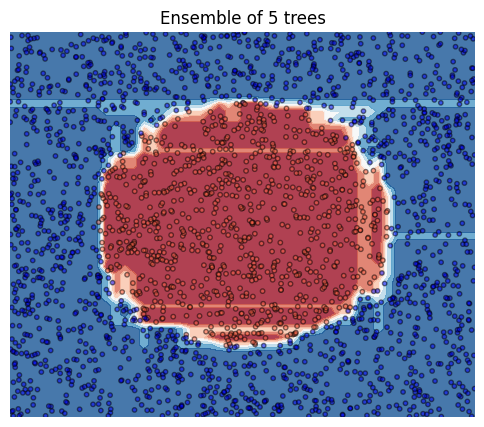

In [322]:
fig, ax = plt.subplots(figsize=(6,5))

DecisionBoundaryDisplay.from_estimator(rf, X, cmap=cm, alpha=.8, ax=ax, eps=.5)

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', alpha=.5, s=10)

ax.set_title('Ensemble of 5 trees')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off');

In [338]:
train_loss = []
test_loss = []

for i in range(1, 50):

  rf = RandomForestClassifier(n_estimators=i,
                              max_leaf_nodes=num_samples,
                              max_features=1,
                              bootstrap=True)

  rf.fit(X_train, y_train)

  train_pred = rf.predict(X_train)
  test_pred = rf.predict(X_test)

  train_loss.append(log_loss(y_train, train_pred))
  test_loss.append(log_loss(y_test, test_pred))

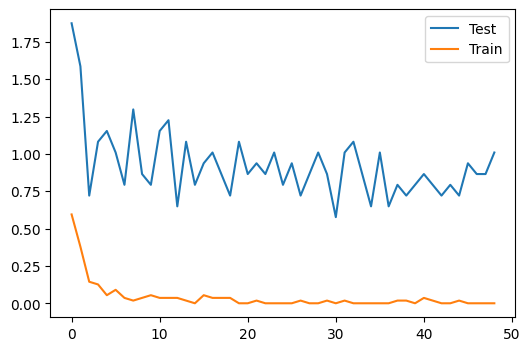

In [339]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(test_loss, label='Test')
ax.plot(train_loss, label='Train')

ax.legend();